   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-30-32ee6498abe1>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


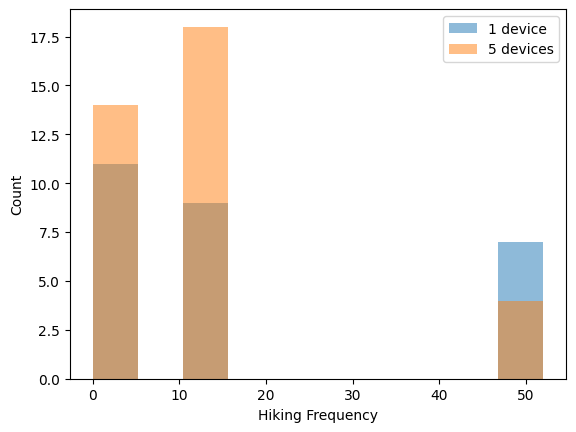

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


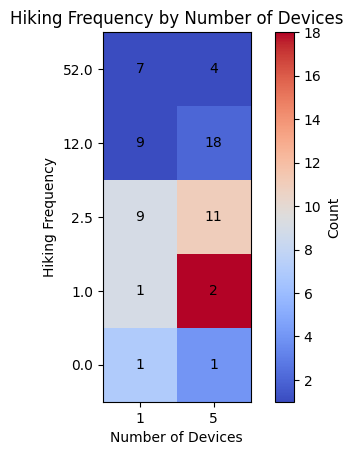


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

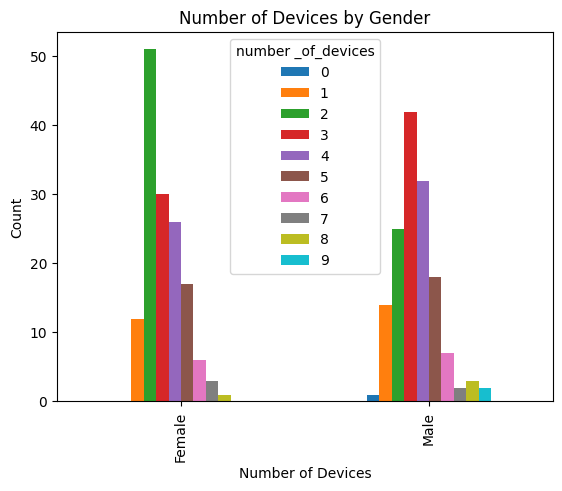

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25



chi-square test
p-value: 1.0
Residuals:
number _of_devices    2
Gender                 
Female              0.0
Male                0.0

n-1 two proportion test on the pivot table


C:\Users\jnrpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\proportion.py:1004: RuntimeWarning: divide by zero encountered in divide
  prop = count * 1. / nobs
C:\Users\jnrpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\proportion.py:1004: RuntimeWarning: invalid value encountered in divide
  prop = count * 1. / nobs


NotImplementedError: more than two samples are not implemented yet

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

#perform a chi-square test on the pivot table and print the p-value and residuals 
print('\nchi-square test')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender_2_devices)
print("p-value:", p)
residuals = (pivot_table_gender_2_devices - expected) / expected
print("Residuals:")
print(residuals)





# Perform n-1 two proportion test on the pivot table
print('\nn-1 two proportion test on the pivot table')
# Get the counts and number of observations for Male and Female
count1 = pivot_table_gender.iloc[0, :-1].values
count2 = pivot_table_gender.iloc[1, :-1].values
nobs1 = pivot_table_gender.iloc[0, -1]
nobs2 = pivot_table_gender.iloc[1, -1]

# Reshape the counts arrays
count1 = count1.reshape(-1, 1)
count2 = count2.reshape(-1, 1)

# Perform the two proportion test
stat, p_value = proportions_ztest(count=[count1, count2], nobs=[nobs1, nobs2])

# Print p-value
print("p-value:", p_value)

# Calculate residuals
expected1 = nobs1 * (count1 + count2) / (nobs1 + nobs2)
expected2 = nobs2 * (count1 + count2) / (nobs1 + nobs2)
residuals = (pivot_table_gender.iloc[:, :-1] - expected1) / expected2

# Display the residuals in a table
print("Residuals:")
print(residuals)

# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-31-ea2f69cad015>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


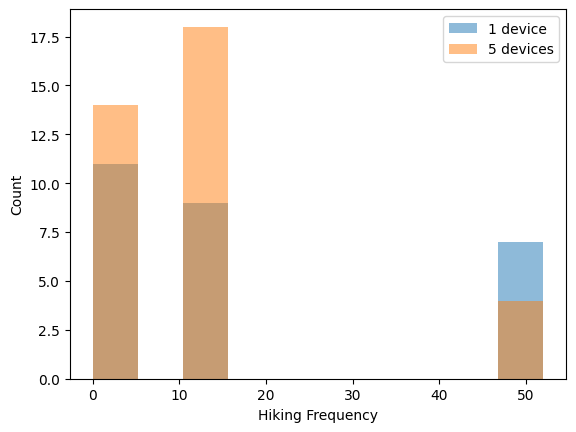

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


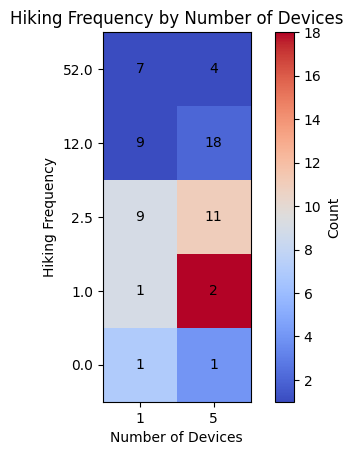


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

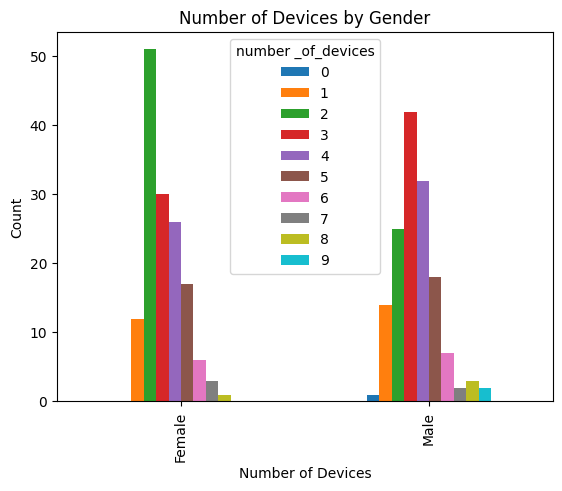

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25



chi-square test
p-value: 1.0
Residuals:
number _of_devices    2
Gender                 
Female              0.0
Male                0.0


IndexError: single positional indexer is out-of-bounds

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

#perform a chi-square test on the pivot table and print the p-value and residuals 
print('\nchi-square test')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender_2_devices)
print("p-value:", p)
residuals = (pivot_table_gender_2_devices - expected) / expected
print("Residuals:")
print(residuals)





# Create a new dataframe that contains rows with 2 in the number _of_devices column and the Gender column
df_2_devices_gender = df[df['number _of_devices'] == 2][['number _of_devices', 'Gender']]

# Create a contingency table of Male and Female counts for 2 devices
contingency_table = pd.crosstab(df_2_devices_gender['Gender'], df_2_devices_gender['number _of_devices'])

# Perform a two proportion test
stat, p_value = proportions_ztest(contingency_table.iloc[:, 1], contingency_table.sum(axis=1))

# Print the p-value
print("p-value:", p_value)

# Create a heatmap of the contingency table
plt.imshow(contingency_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(contingency_table.columns)-0.5, -0.5, len(contingency_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks(range(len(contingency_table.columns)), contingency_table.columns)
plt.yticks(range(len(contingency_table.index)), contingency_table.index)
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        plt.text(j, i, contingency_table.iloc[i, j], ha='center', va='center', color='black')
plt.title('Gender vs Number of Devices (2)')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-32-ea2f69cad015>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


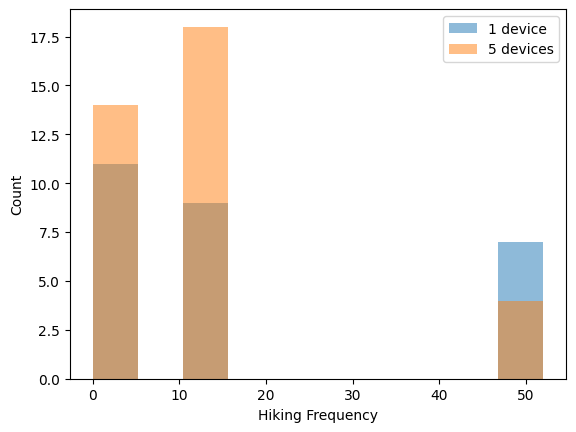

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


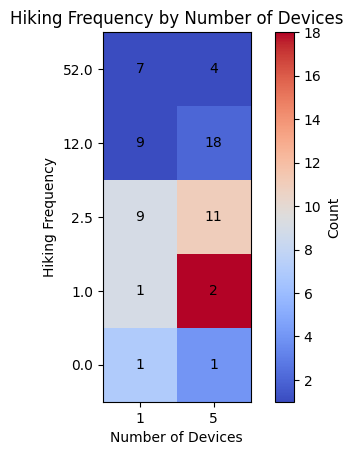


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

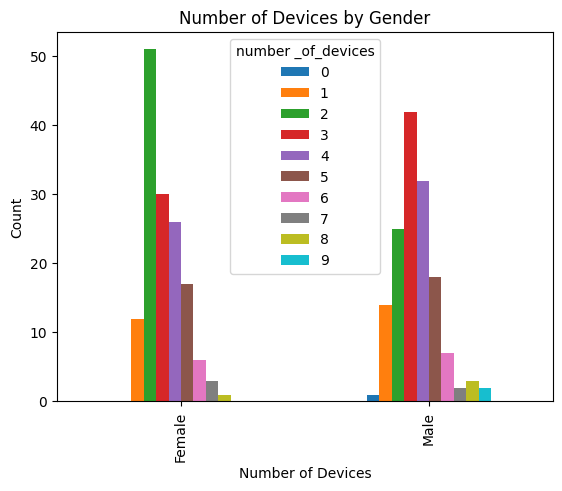

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25



chi-square test
p-value: 1.0
Residuals:
number _of_devices    2
Gender                 
Female              0.0
Male                0.0


IndexError: single positional indexer is out-of-bounds

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

#perform a chi-square test on the pivot table and print the p-value and residuals 
print('\nchi-square test')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender_2_devices)
print("p-value:", p)
residuals = (pivot_table_gender_2_devices - expected) / expected
print("Residuals:")
print(residuals)





# Create a new dataframe that contains rows with 2 in the number _of_devices column and the Gender column
df_2_devices_gender = df[df['number _of_devices'] == 2][['number _of_devices', 'Gender']]

# Create a contingency table of Male and Female counts for 2 devices
contingency_table = pd.crosstab(df_2_devices_gender['Gender'], df_2_devices_gender['number _of_devices'])

# Perform a two proportion test
stat, p_value = proportions_ztest(contingency_table.iloc[:, 1], contingency_table.sum(axis=1))

# Print the p-value
print("p-value:", p_value)

# Create a heatmap of the contingency table
plt.imshow(contingency_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(contingency_table.columns)-0.5, -0.5, len(contingency_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks(range(len(contingency_table.columns)), contingency_table.columns)
plt.yticks(range(len(contingency_table.index)), contingency_table.index)
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        plt.text(j, i, contingency_table.iloc[i, j], ha='center', va='center', color='black')
plt.title('Gender vs Number of Devices (2)')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-33-e1b9837f8918>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


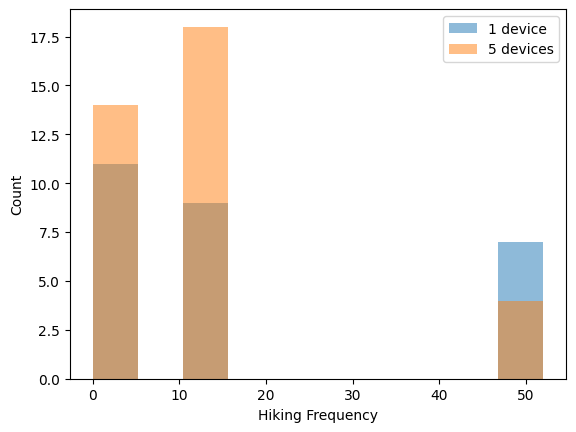

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


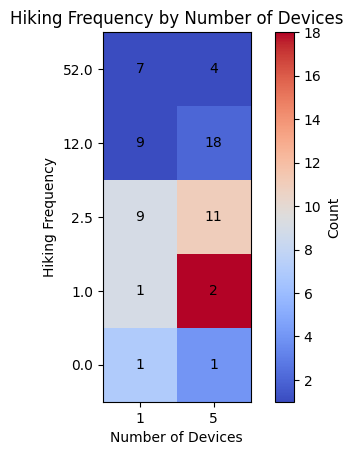


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

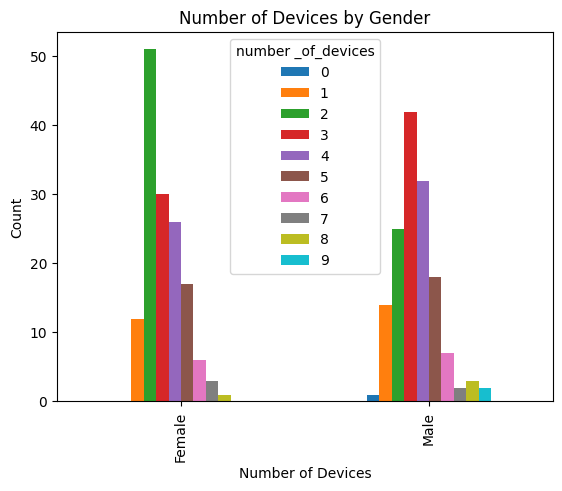

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25



chi-square test
p-value: 1.0
Residuals:
number _of_devices    2
Gender                 
Female              0.0
Male                0.0


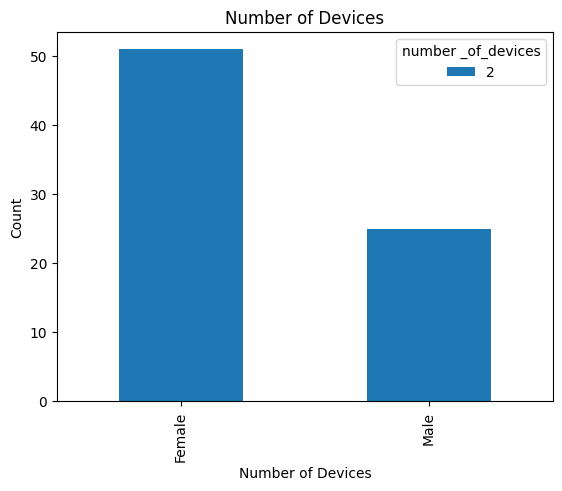

done


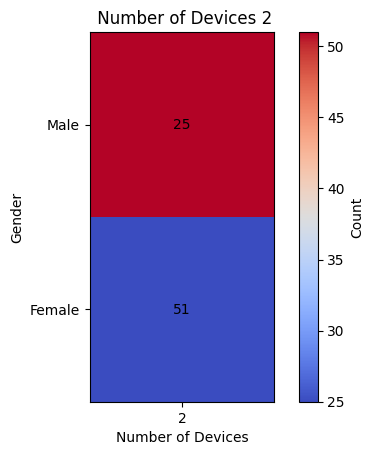


1 device and combined columns created
    number _of_devices                           combined
10                   1                                GPS
11                   1   Activity tracker (like a Fitbit)
21                   1                         Smartphone
28                   1                         Smartphone
53                   1                         Smartphone

combined and 1 device in a pivot table
combined             Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                            
1                                                   2     1   

combined             Headphones/earbuds   Smart watch  Smartphone  
number _of_devices                                                 
1                                     2             1          21  
combined            Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                           
1                                               7.4%  3

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

#perform a chi-square test on the pivot table and print the p-value and residuals 
print('\nchi-square test')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender_2_devices)
print("p-value:", p)
residuals = (pivot_table_gender_2_devices - expected) / expected
print("Residuals:")
print(residuals)







# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-34-f599adb256ff>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


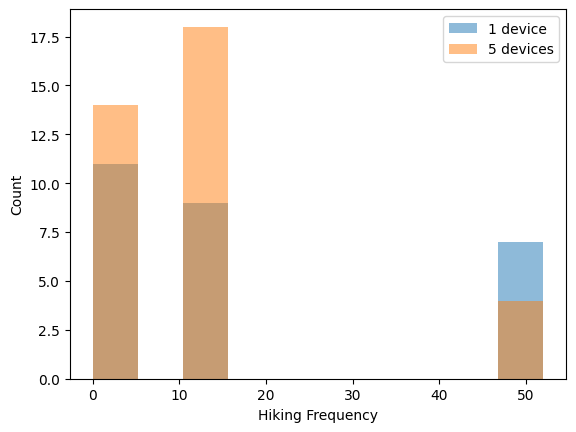

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


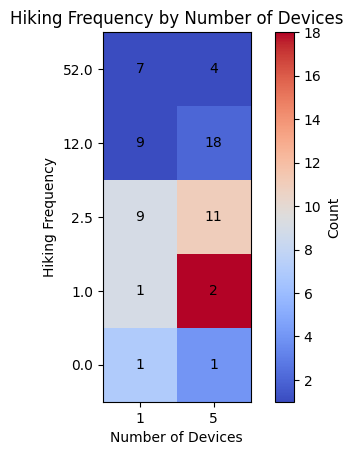


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

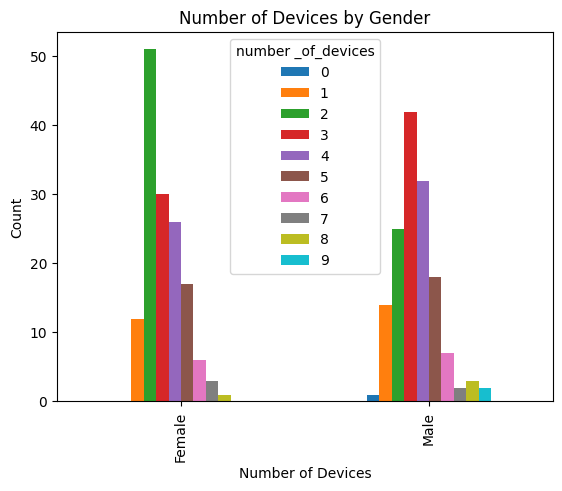

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


two proportion test
p-value: nan

chi-square test
p-value: 1.0
Residuals:
number _of_devices    2
Gender                 
Female              0.0
Male                0.0


C:\Users\jnrpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


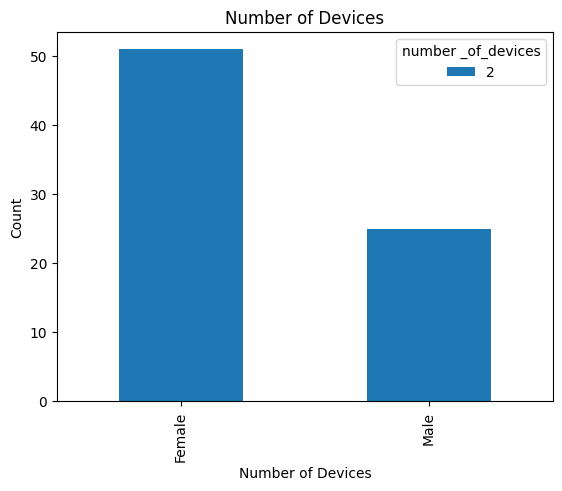

done


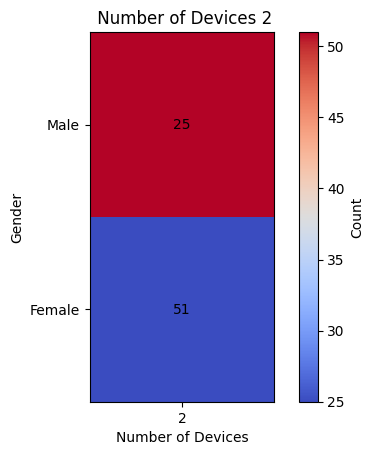


1 device and combined columns created
    number _of_devices                           combined
10                   1                                GPS
11                   1   Activity tracker (like a Fitbit)
21                   1                         Smartphone
28                   1                         Smartphone
53                   1                         Smartphone

combined and 1 device in a pivot table
combined             Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                            
1                                                   2     1   

combined             Headphones/earbuds   Smart watch  Smartphone  
number _of_devices                                                 
1                                     2             1          21  
combined            Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                           
1                                               7.4%  3

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# Perform a two proportion test
print('two proportion test')
count1 = pivot_table_gender_2_devices.loc['Female', 2]
count2 = pivot_table_gender_2_devices.loc['Male', 2]
nobs1 = pivot_table_gender_2_devices.sum(axis=1)['Female']
nobs2 = pivot_table_gender_2_devices.sum(axis=1)['Male']

stat, p_value = proportions_ztest([count1, count2], [nobs1, nobs2])

# Print the p-value
print("p-value:", p_value)

#perform a chi-square test on the pivot table and print the p-value and residuals 
print('\nchi-square test')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender_2_devices)
print("p-value:", p)
residuals = (pivot_table_gender_2_devices - expected) / expected
print("Residuals:")
print(residuals)







# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-35-822dbca3cd83>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


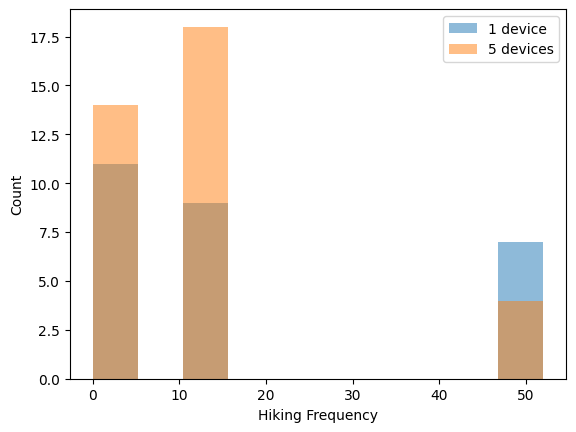

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


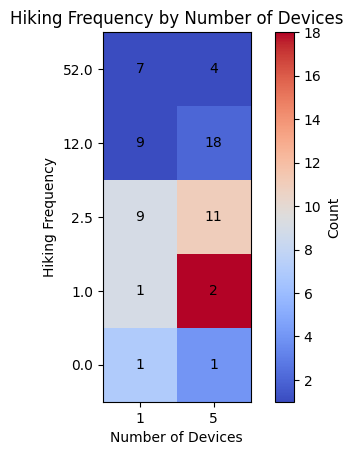


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

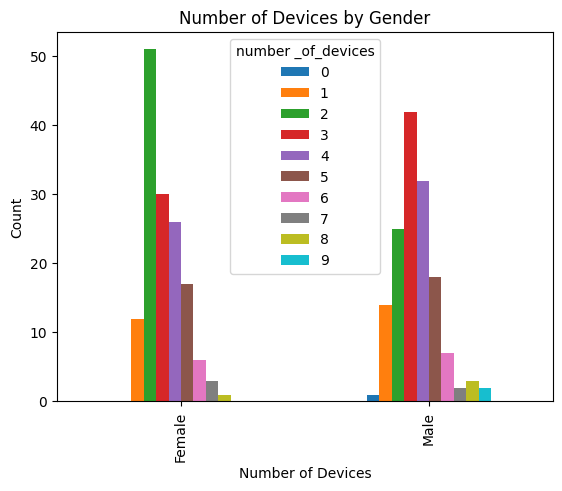

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25




KeyError: 'number_of_devices'

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# Perform a two proportion test

# Assuming df is your DataFrame and it has 'Gender' and 'number_of_devices' columns

# Step 2: Prepare your data
# Count the number of males and females using exactly 2 devices
count_male = df[(df['Gender'] == 'Male') & (df['number_of_devices'] == 2)].shape[0]
count_female = df[(df['Gender'] == 'Female') & (df['number_of_devices'] == 2)].shape[0]

# Total number of males and females (assuming these are the only two genders in your dataset)
nobs_male = df[df['Gender'] == 'Male'].shape[0]
nobs_female = df[df['Gender'] == 'Female'].shape[0]

# Step 3: Perform the z-test
stat, p_value = proportions_ztest([count_female, count_male], [nobs_female, nobs_male])

# Step 4: Print the p-value
print("p-value:", p_value)

#perform a chi-square test on the pivot table and print the p-value and residuals 
print('\nchi-square test')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender_2_devices)
print("p-value:", p)
residuals = (pivot_table_gender_2_devices - expected) / expected
print("Residuals:")
print(residuals)







# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-36-adfdd68dc865>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


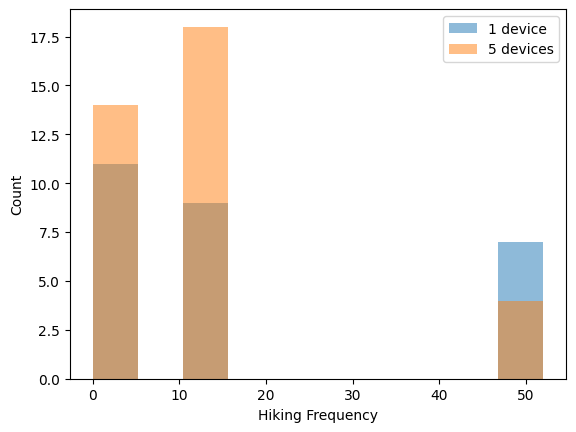

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


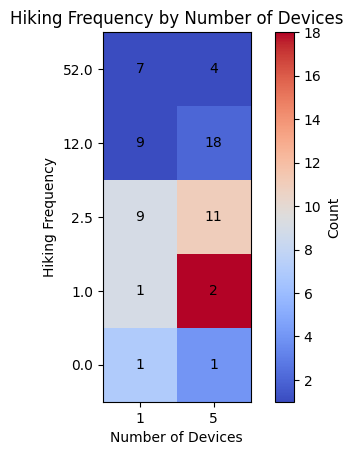


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

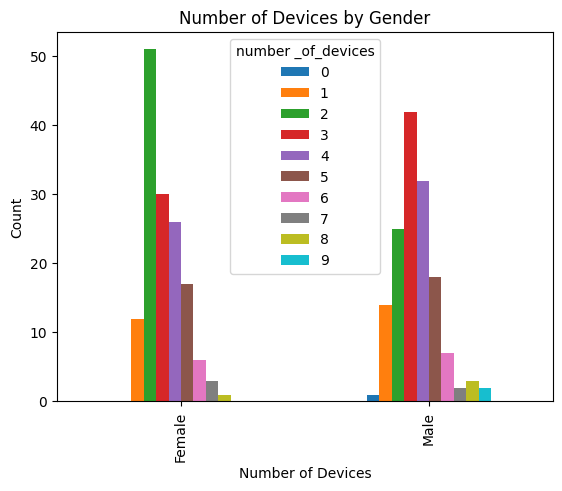

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25



chi-square test
p-value: 1.0
Residuals:
number _of_devices    2
Gender                 
Female              0.0
Male                0.0


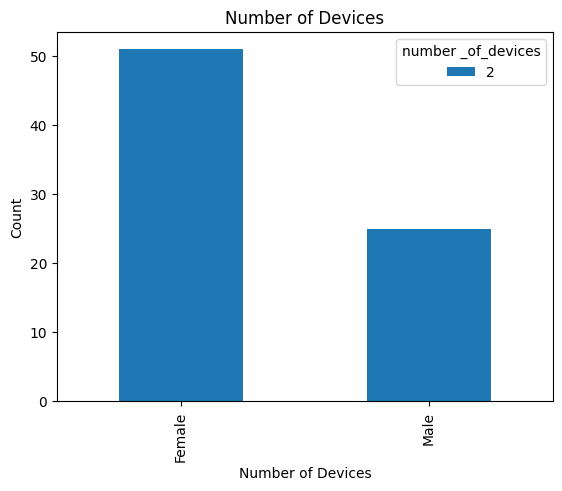

done


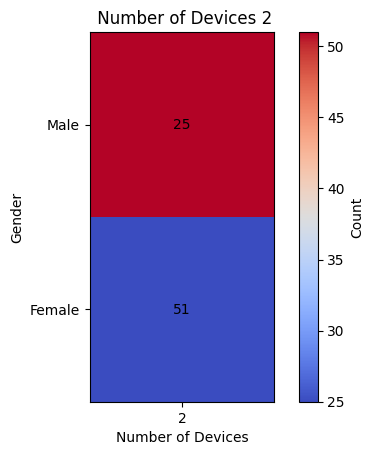


1 device and combined columns created
    number _of_devices                           combined
10                   1                                GPS
11                   1   Activity tracker (like a Fitbit)
21                   1                         Smartphone
28                   1                         Smartphone
53                   1                         Smartphone

combined and 1 device in a pivot table
combined             Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                            
1                                                   2     1   

combined             Headphones/earbuds   Smart watch  Smartphone  
number _of_devices                                                 
1                                     2             1          21  
combined            Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                           
1                                               7.4%  3

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')




#perform a chi-square test on the pivot table and print the p-value and residuals 
print('\nchi-square test')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender_2_devices)
print("p-value:", p)
residuals = (pivot_table_gender_2_devices - expected) / expected
print("Residuals:")
print(residuals)







# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-37-d405ea307af6>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


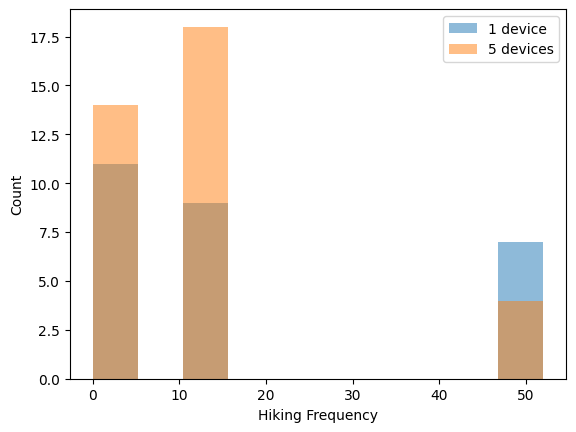

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


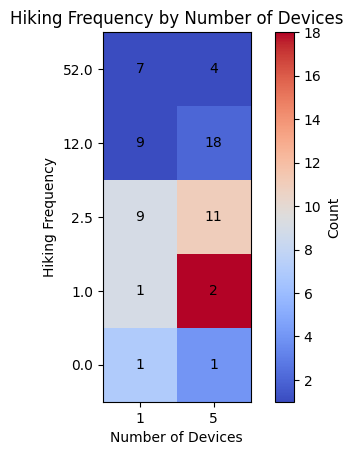


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

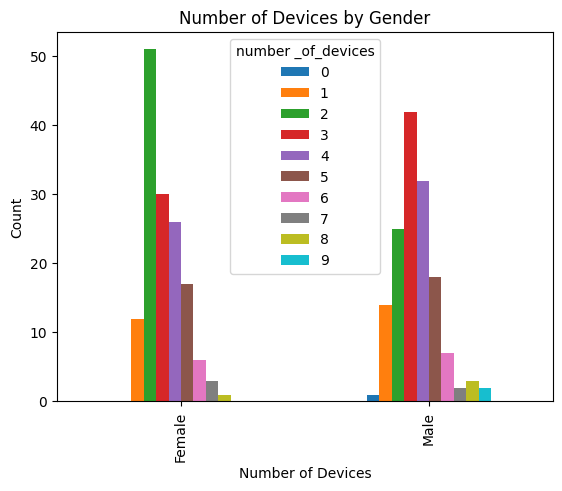

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

chi-square test
p-value: 1.0
Residuals:
number _of_devices    2
Gender                 
Female              0.0
Male                0.0


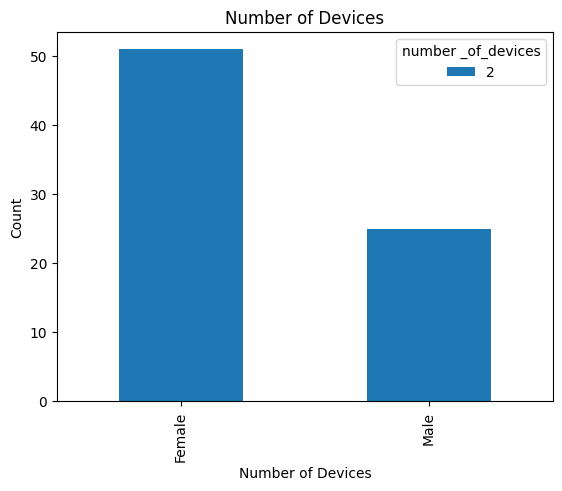

done


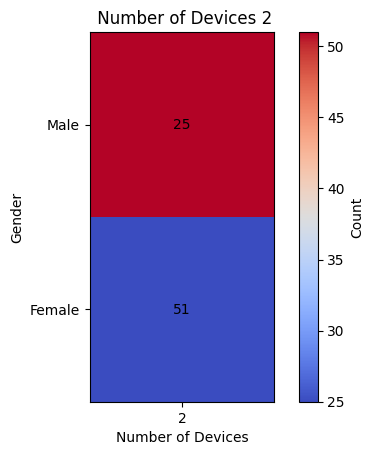


1 device and combined columns created
    number _of_devices                           combined
10                   1                                GPS
11                   1   Activity tracker (like a Fitbit)
21                   1                         Smartphone
28                   1                         Smartphone
53                   1                         Smartphone

combined and 1 device in a pivot table
combined             Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                            
1                                                   2     1   

combined             Headphones/earbuds   Smart watch  Smartphone  
number _of_devices                                                 
1                                     2             1          21  
combined            Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                           
1                                               7.4%  3

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)






#perform a chi-square test on the pivot table and print the p-value and residuals 
print('\nchi-square test')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender_2_devices)
print("p-value:", p)
residuals = (pivot_table_gender_2_devices - expected) / expected
print("Residuals:")
print(residuals)







# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-38-41eea3c714d9>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


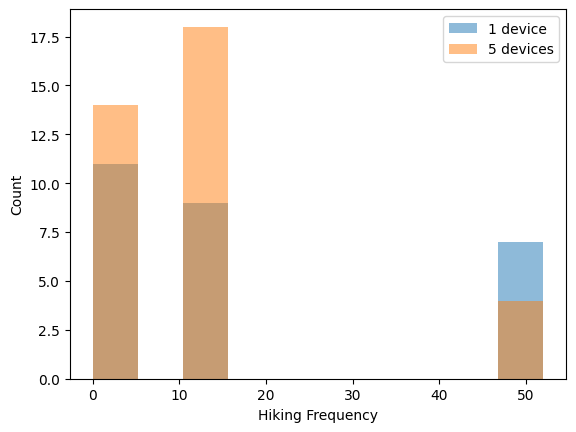

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


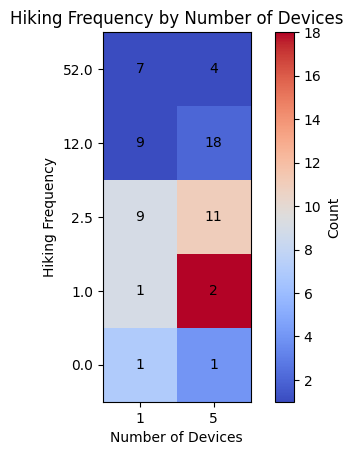


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

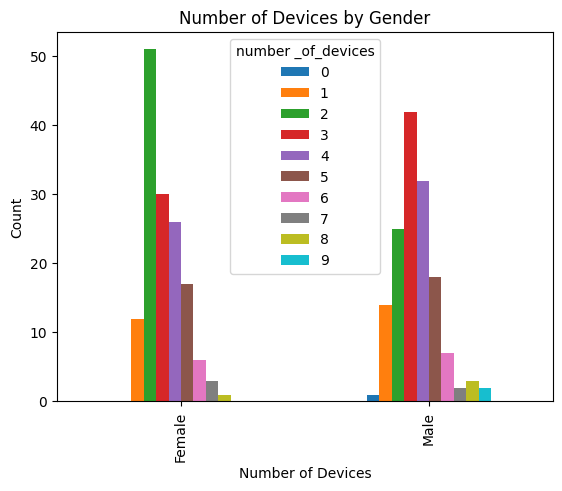

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test
p-value: 0.00438572320611221


ValueError: Unable to coerce to DataFrame, shape must be (2, 1): given (2, 10)

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)
residuals = (pivot_table_gender_2_devices - expected) / expected
print("Residuals:")
print(residuals)







# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-39-fa543b09feea>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


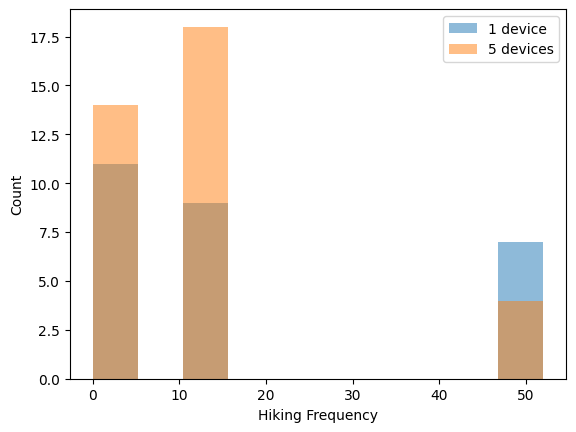

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


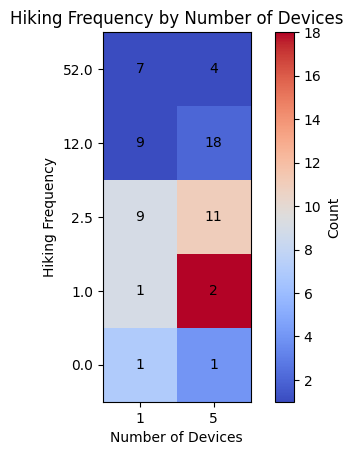


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

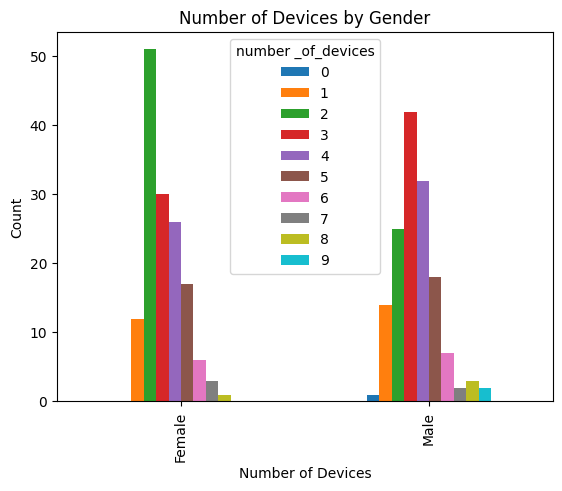

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test
p-value: 0.00438572320611221
Residuals:


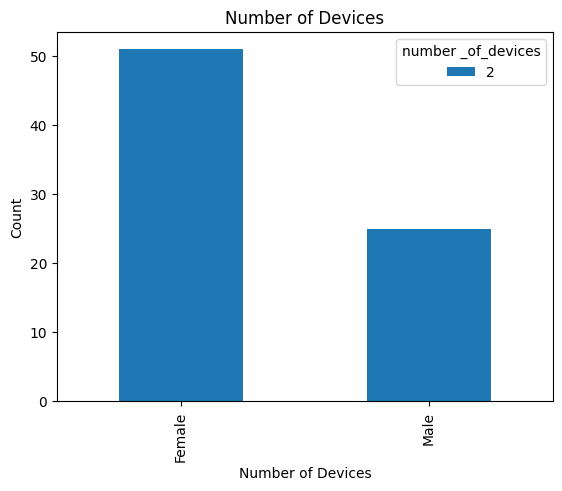

done


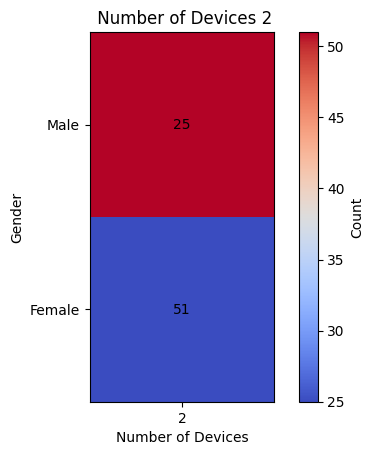


1 device and combined columns created
    number _of_devices                           combined
10                   1                                GPS
11                   1   Activity tracker (like a Fitbit)
21                   1                         Smartphone
28                   1                         Smartphone
53                   1                         Smartphone

combined and 1 device in a pivot table
combined             Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                            
1                                                   2     1   

combined             Headphones/earbuds   Smart watch  Smartphone  
number _of_devices                                                 
1                                     2             1          21  
combined            Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                           
1                                               7.4%  3

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)
#residuals = (pivot_table_gender_2_devices - expected) / expected
print("Residuals:")
#print(residuals)







# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-40-db0e122a0716>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


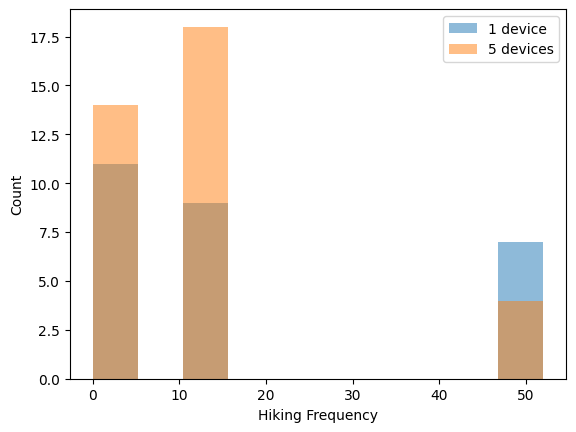

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


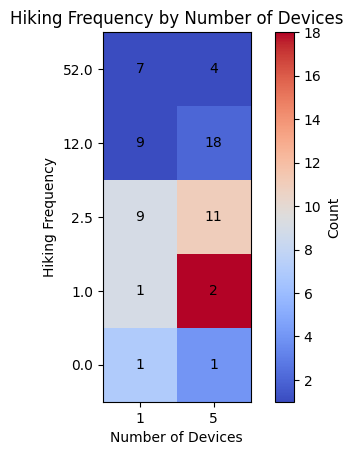


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

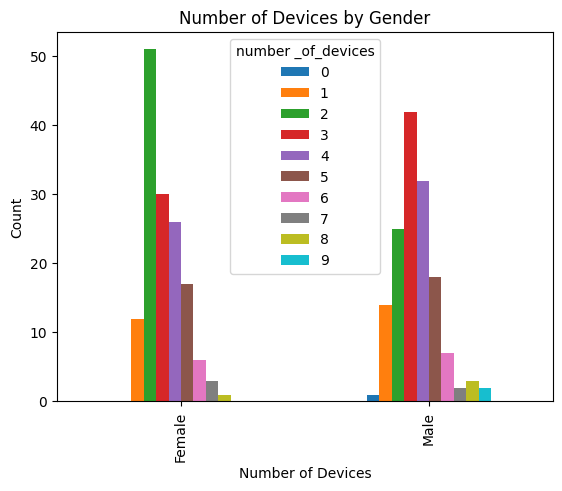

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test
p-value: 0.00438572320611221
Residuals:


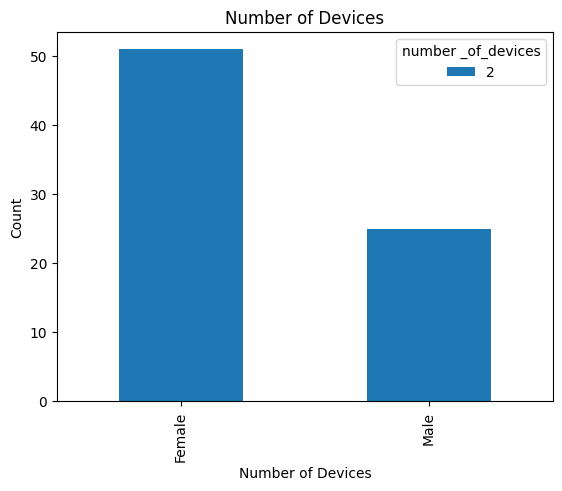

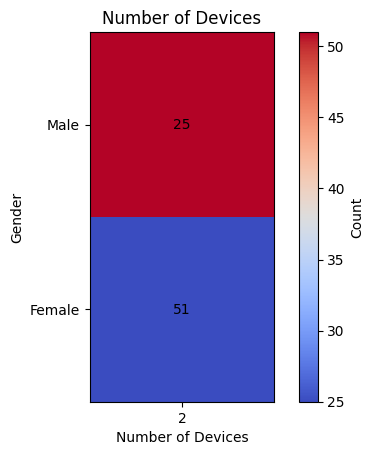

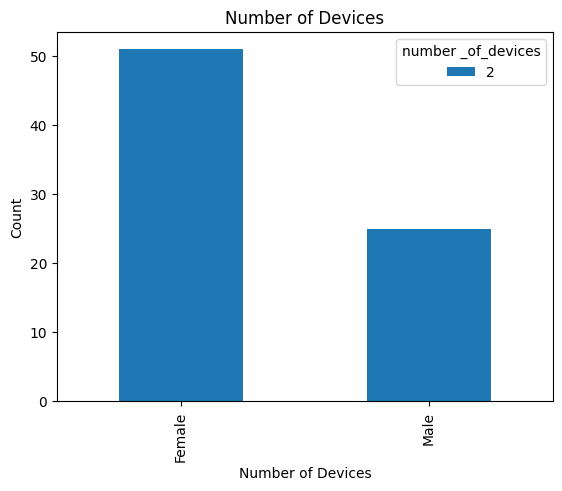

done


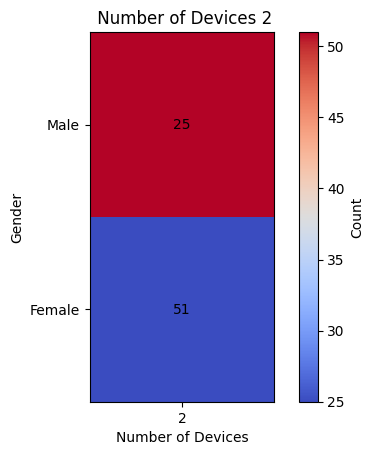


1 device and combined columns created
    number _of_devices                           combined
10                   1                                GPS
11                   1   Activity tracker (like a Fitbit)
21                   1                         Smartphone
28                   1                         Smartphone
53                   1                         Smartphone

combined and 1 device in a pivot table
combined             Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                            
1                                                   2     1   

combined             Headphones/earbuds   Smart watch  Smartphone  
number _of_devices                                                 
1                                     2             1          21  
combined            Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                           
1                                               7.4%  3

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)
#residuals = (pivot_table_gender_2_devices - expected) / expected
print("Residuals:")
#print(residuals)

# create a bar graph of the two-proportion z-test
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()

# create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow(pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table_gender_2_devices.columns)-0.5, -0.5, len(pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks(range(len(pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks(range(len(pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range(len(pivot_table_gender_2_devices.index)):
    for j in range(len(pivot_table_gender_2_devices.columns)):
        plt.text(j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title('Number of Devices')
plt.show()







# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-41-ed5895d752f9>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


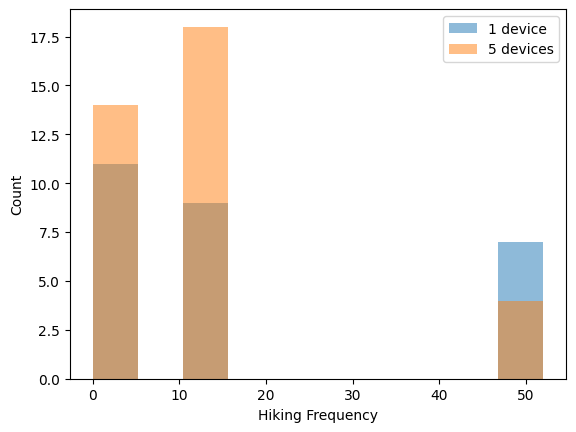

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


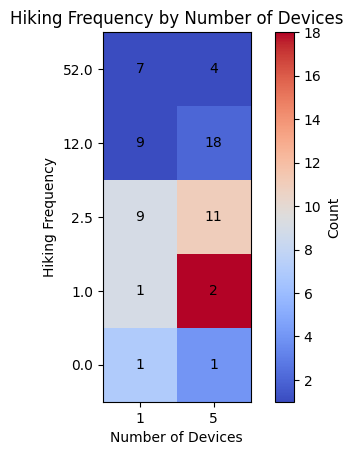


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

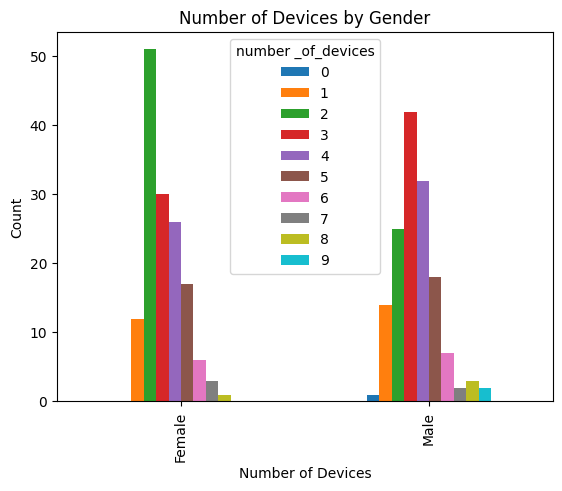

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test
p-value: 0.00438572320611221


ValueError: Unable to coerce to DataFrame, shape must be (2, 1): given (2, 10)

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)
# Calculate residuals
residuals = (pivot_table_gender_2_devices - expected) / expected

# Display the residuals
print("Residuals:")
print(residuals)








# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-42-1e2b0d02fd5f>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


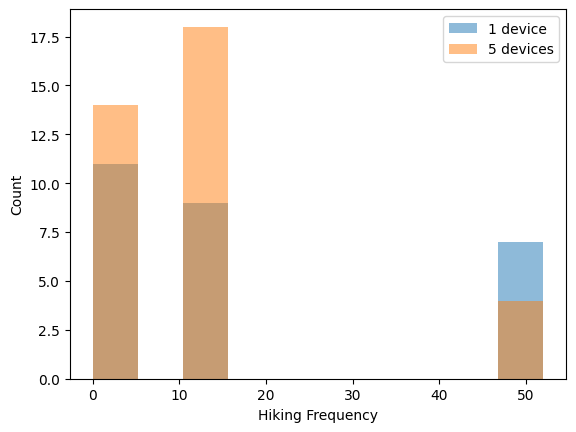

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


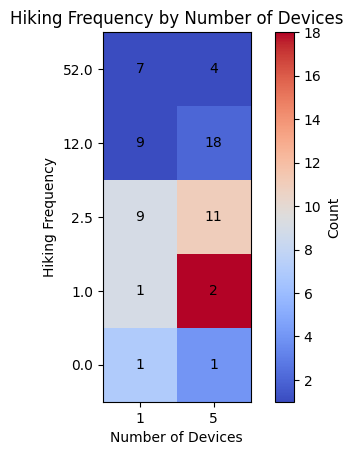


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

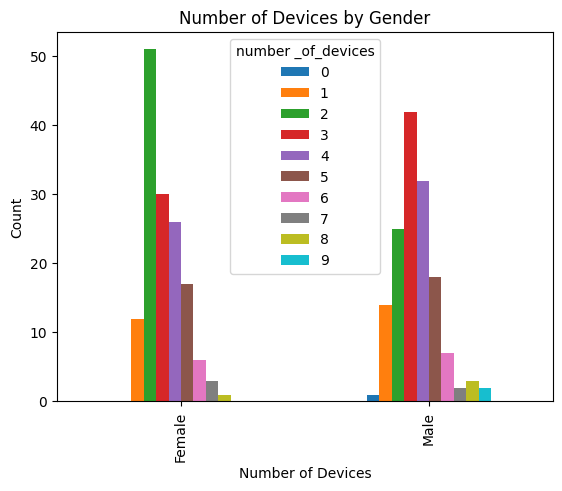

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test
p-value: 0.00438572320611221


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)
# Calculate residuals
# Calculate the expected values
expected = pivot_table_gender_2_devices.sum(axis=0) * pivot_table_gender_2_devices.sum(axis=1)[:, np.newaxis] / pivot_table_gender_2_devices.sum().sum()

# Calculate the residuals
residuals = (pivot_table_gender_2_devices - expected) / expected

# Display the residuals
print("Residuals:")
print(residuals)








# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-43-bbc5ed0e1de1>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


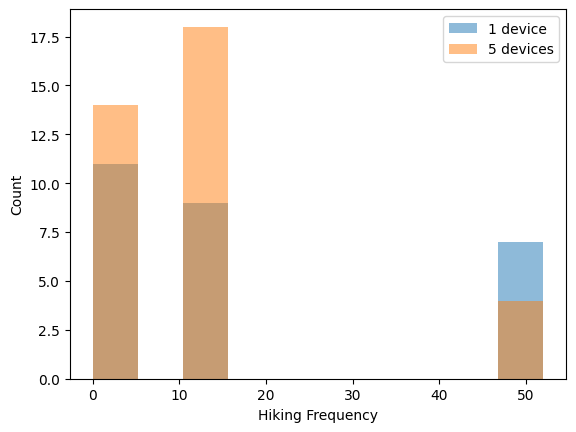

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


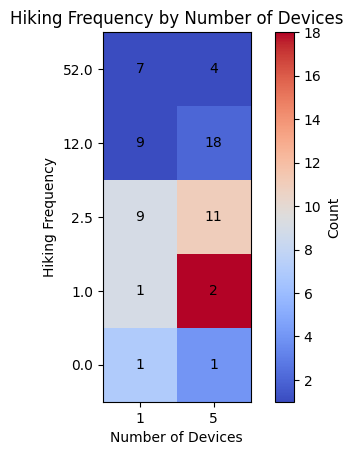


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

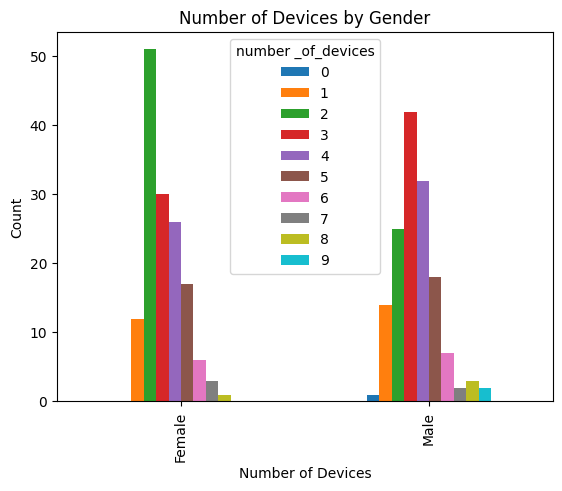

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test
p-value: 0.00438572320611221


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)
# Calculate residuals
# Calculate the expected values
expected_proportions = [p1, p2]
observed_proportions = [pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum(), pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()]
residuals = (observed_proportions - expected_proportions) / np.sqrt(expected_proportions * (1 - expected_proportions))

# Display the residuals
print("Residuals:")
print(residuals)








# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-44-5893c333cb9e>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


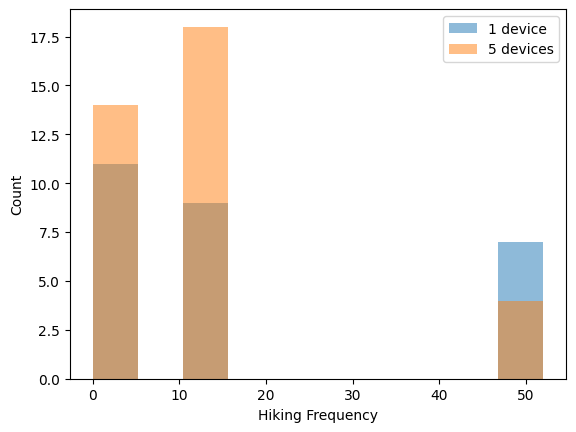

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


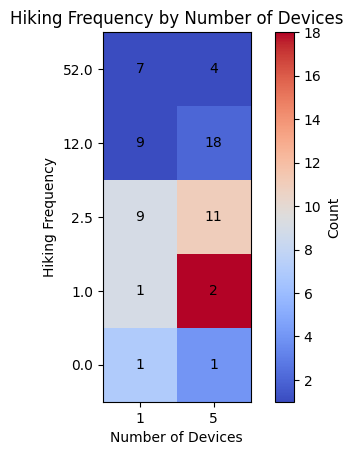


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

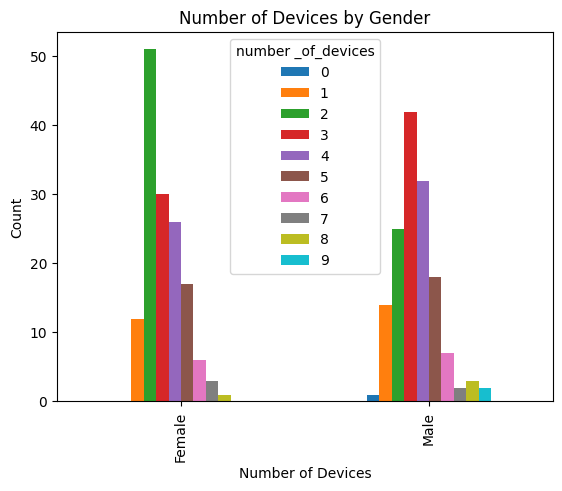

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test
p-value: 0.00438572320611221


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)
# Calculate residuals
# Calculate the expected values
expected_proportions = [p1, p2]
observed_proportions = [pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum(), pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()]
residuals = (observed_proportions - expected_proportions) / np.sqrt(expected_proportions * (1 - expected_proportions))

# Display the residuals
print("Residuals:")
print(residuals)








# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-45-5893c333cb9e>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


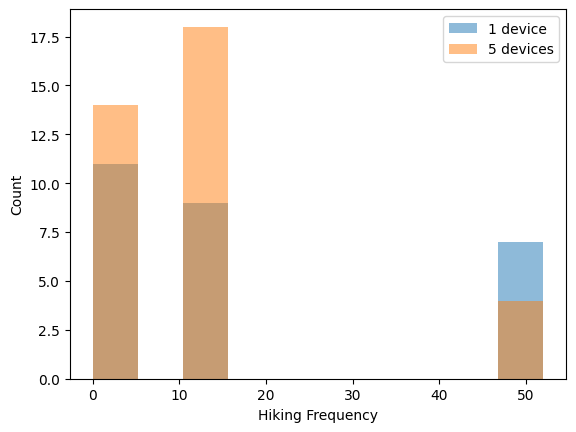

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


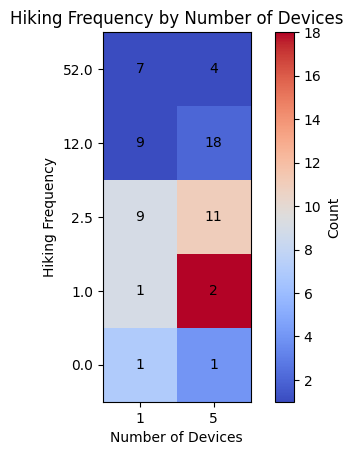


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

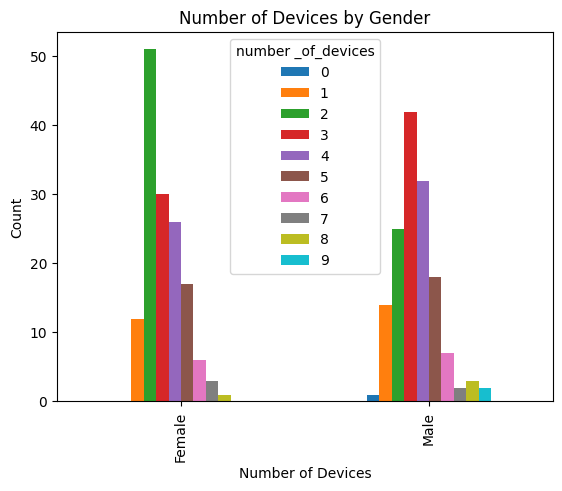

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test
p-value: 0.00438572320611221


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)
# Calculate residuals
# Calculate the expected values
expected_proportions = [p1, p2]
observed_proportions = [pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum(), pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()]
residuals = (observed_proportions - expected_proportions) / np.sqrt(expected_proportions * (1 - expected_proportions))

# Display the residuals
print("Residuals:")
print(residuals)








# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-46-6825d92a918c>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


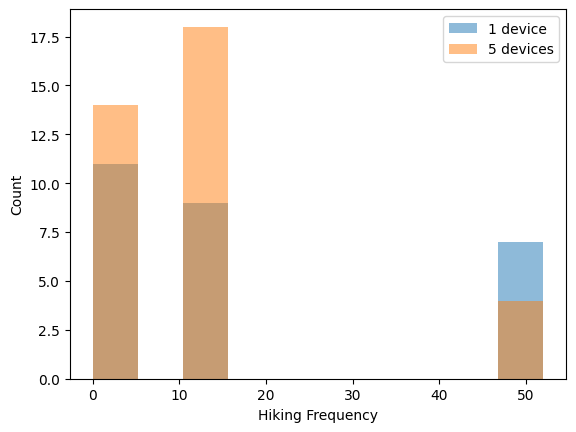

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


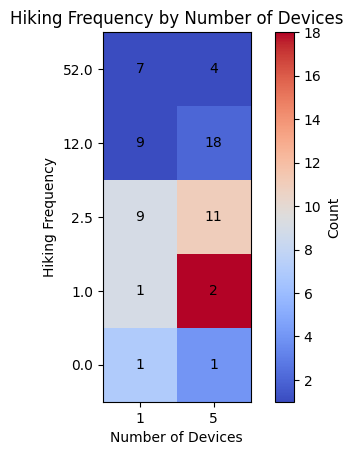


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

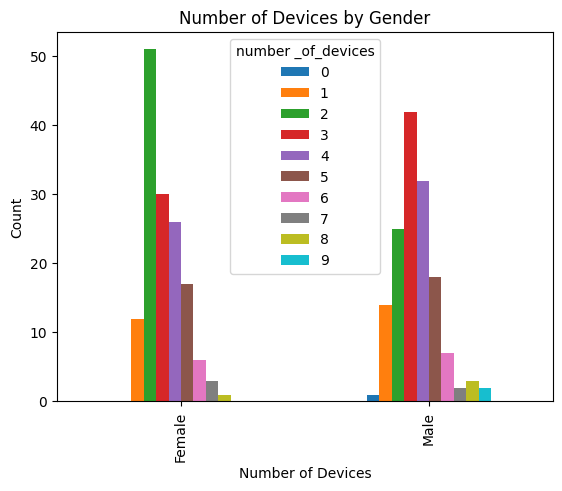

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test
p-value: 0.00438572320611221
Residuals:
[0.0, 0.0]


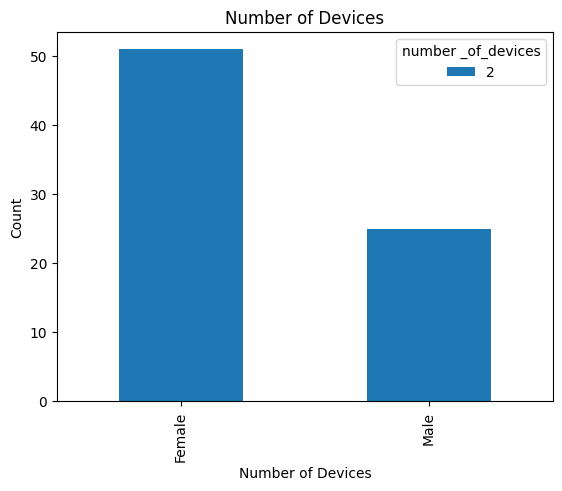

done


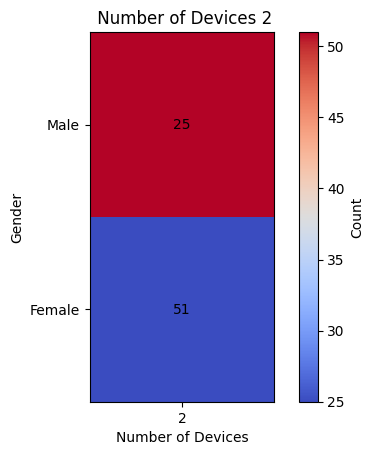


1 device and combined columns created
    number _of_devices                           combined
10                   1                                GPS
11                   1   Activity tracker (like a Fitbit)
21                   1                         Smartphone
28                   1                         Smartphone
53                   1                         Smartphone

combined and 1 device in a pivot table
combined             Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                            
1                                                   2     1   

combined             Headphones/earbuds   Smart watch  Smartphone  
number _of_devices                                                 
1                                     2             1          21  
combined            Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                           
1                                               7.4%  3

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)
# Calculate residuals
# Calculate the expected values
expected_proportions = [p1, p2]
observed_proportions = [pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum(), pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()]
residuals = [(obs - exp) / np.sqrt(exp * (1 - exp)) for obs, exp in zip(observed_proportions, expected_proportions)]

# Display the residuals
print("Residuals:")
print(residuals)








# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-47-a36845529de1>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


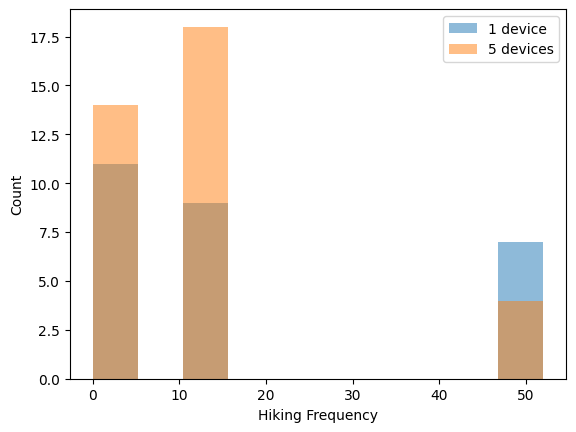

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


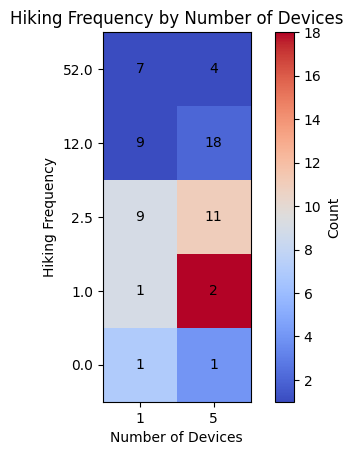


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

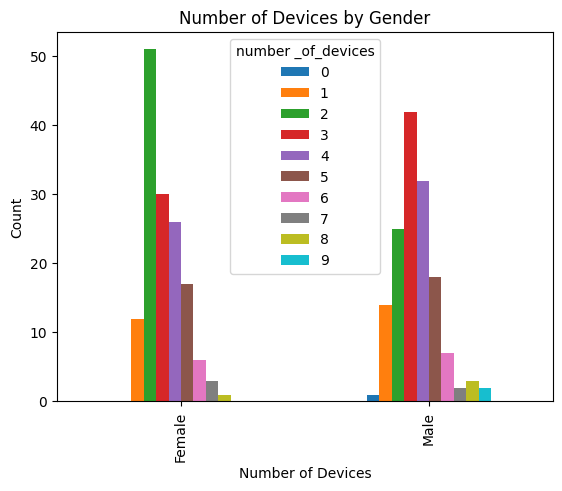

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test
p-value: 0.00438572320611221
Residuals:
[0.0, 0.0]

Two-proportion z-test using blackbox ai


NameError: name 'proportions' is not defined

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)
# Calculate residuals
# Calculate the expected values
expected_proportions = [p1, p2]
observed_proportions = [pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum(), pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()]
residuals = [(obs - exp) / np.sqrt(exp * (1 - exp)) for obs, exp in zip(observed_proportions, expected_proportions)]

# Display the residuals
print("Residuals:")
print(residuals)


#using blackbox ai to perform the two-proportion z-test
print('\nTwo-proportion z-test using blackbox ai')
z, p = proportions
print("p-value:", p)
print("z-value:", z)








# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-48-d40860f4bfaf>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


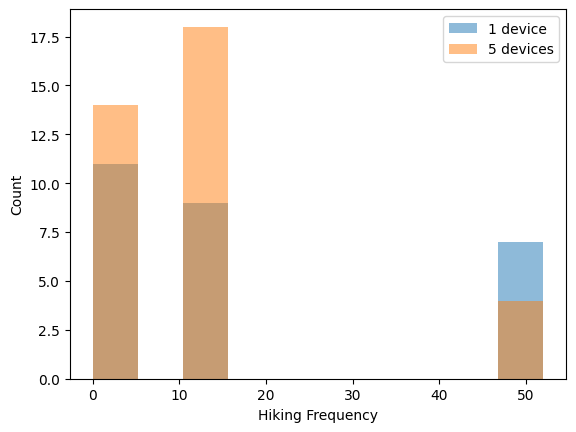

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


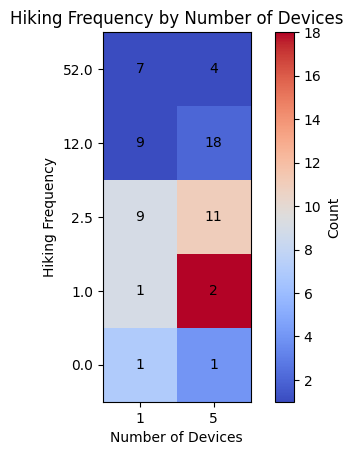


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

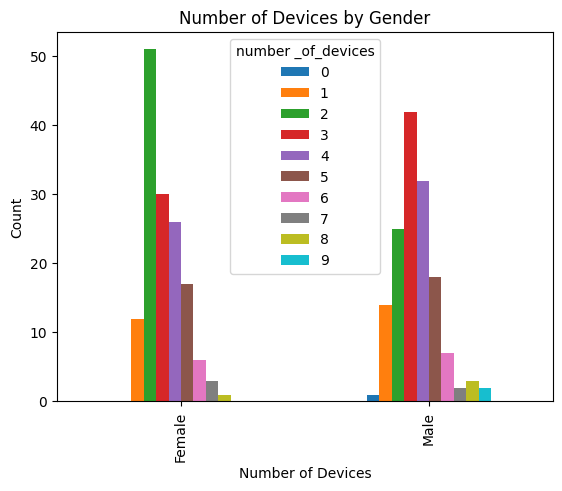

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test
p-value: 0.00438572320611221
Residuals:
[0.0, 0.0]

Two-proportion z-test using blackbox ai
z-statistic: -3.46761682885161
p-value: 0.0005250954345952635


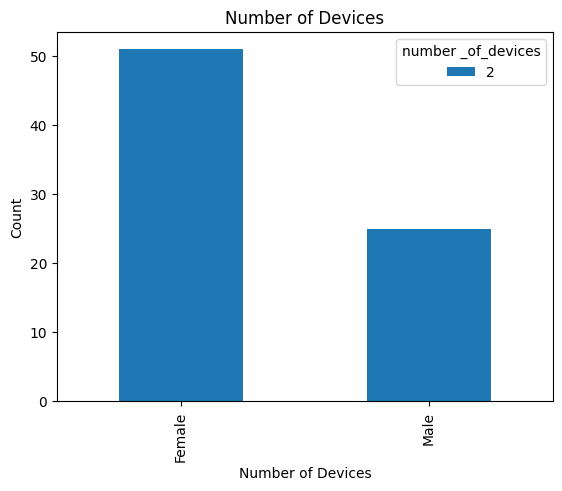

done


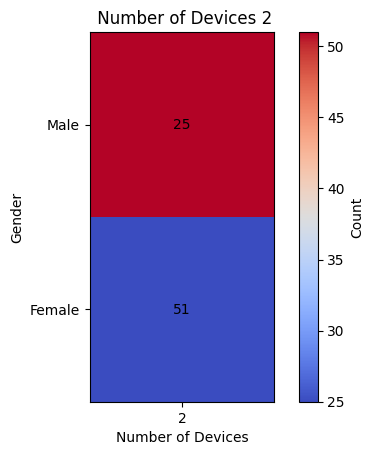


1 device and combined columns created
    number _of_devices                           combined
10                   1                                GPS
11                   1   Activity tracker (like a Fitbit)
21                   1                         Smartphone
28                   1                         Smartphone
53                   1                         Smartphone

combined and 1 device in a pivot table
combined             Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                            
1                                                   2     1   

combined             Headphones/earbuds   Smart watch  Smartphone  
number _of_devices                                                 
1                                     2             1          21  
combined            Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                           
1                                               7.4%  3

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)
# Calculate residuals
# Calculate the expected values
expected_proportions = [p1, p2]
observed_proportions = [pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum(), pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()]
residuals = [(obs - exp) / np.sqrt(exp * (1 - exp)) for obs, exp in zip(observed_proportions, expected_proportions)]

# Display the residuals
print("Residuals:")
print(residuals)


#using blackbox ai to perform the two-proportion z-test
print('\nTwo-proportion z-test using blackbox ai')
from statsmodels.stats.proportion import proportions_ztest

# Calculate the number of males and females
male_count = len(df[(df['Gender'] == 'Male') & (df['number _of_devices'] == 2)])
female_count = len(df[(df['Gender'] == 'Female') & (df['number _of_devices'] == 2)])

# Calculate the total number of observations
total_male = len(df[df['Gender'] == 'Male'])
total_female = len(df[df['Gender'] == 'Female'])

# Calculate the proportions
male_proportion = male_count / total_male
female_proportion = female_count / total_female

# Perform the two-proportion z-test
z, p = proportions_ztest([male_count, female_count], [total_male, total_female])

# Print the results
print("z-statistic:", z)
print("p-value:", p)







# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-49-87af35c7c5a3>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


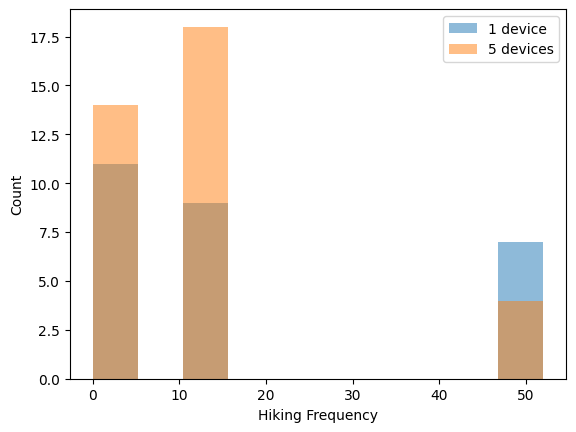

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


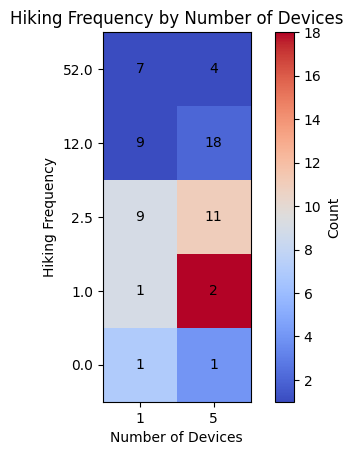


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

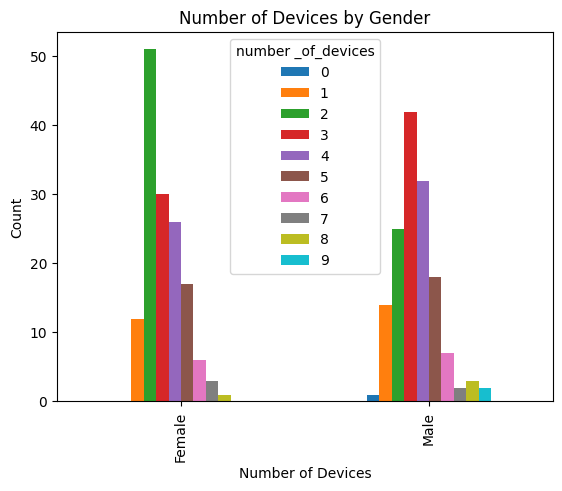

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test using copilot ai
p-value: 0.00438572320611221
z-statistic: -2.848997449424325
Residuals:
[0.0, 0.0]

Two-proportion z-test using blackbox ai
z-statistic: -3.46761682885161
p-value

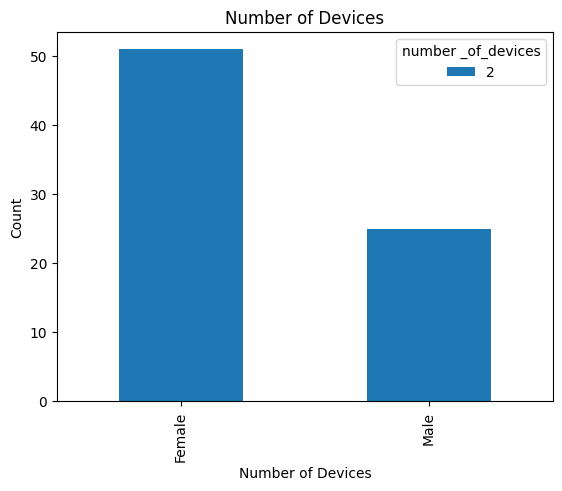

done


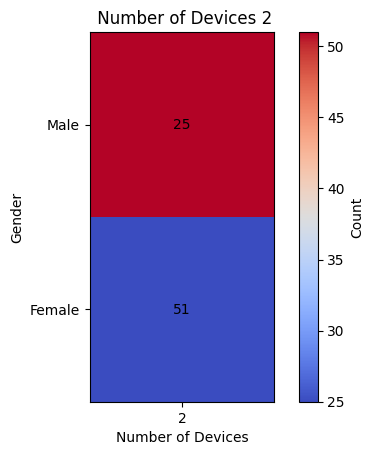


1 device and combined columns created
    number _of_devices                           combined
10                   1                                GPS
11                   1   Activity tracker (like a Fitbit)
21                   1                         Smartphone
28                   1                         Smartphone
53                   1                         Smartphone

combined and 1 device in a pivot table
combined             Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                            
1                                                   2     1   

combined             Headphones/earbuds   Smart watch  Smartphone  
number _of_devices                                                 
1                                     2             1          21  
combined            Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                           
1                                               7.4%  3

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test using copilot ai')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)

# calculate the z-statistic and p-value for the two-proportion z-test
print("z-statistic:", z)
# Calculate residuals
# Calculate the expected values
expected_proportions = [p1, p2]
observed_proportions = [pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum(), pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()]
residuals = [(obs - exp) / np.sqrt(exp * (1 - exp)) for obs, exp in zip(observed_proportions, expected_proportions)]

# Display the residuals
print("Residuals:")
print(residuals)


#using blackbox ai to perform the two-proportion z-test
print('\nTwo-proportion z-test using blackbox ai')
from statsmodels.stats.proportion import proportions_ztest

# Calculate the number of males and females
male_count = len(df[(df['Gender'] == 'Male') & (df['number _of_devices'] == 2)])
female_count = len(df[(df['Gender'] == 'Female') & (df['number _of_devices'] == 2)])

# Calculate the total number of observations
total_male = len(df[df['Gender'] == 'Male'])
total_female = len(df[df['Gender'] == 'Female'])

# Calculate the proportions
male_proportion = male_count / total_male
female_proportion = female_count / total_female

# Perform the two-proportion z-test
z, p = proportions_ztest([male_count, female_count], [total_male, total_female])

# Print the results
print("z-statistic:", z)
print("p-value:", p)

#A z-statistic less than 0 indicates that the observed difference in proportions is less than the expected difference under the null hypothesis, suggesting that the proportion of one group (e.g., males) is lower than the proportion of the other group (e.g., females).
#A large absolute value of the z-statistic (e.g., greater than 2 or less than -2) indicates that the observed difference in proportions is statistically significant, suggesting that the null hypothesis can be rejected







# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')

   Age  Gender hiking_frequency like_to_hike_alone like_to_hike_in_group  \
0   38    Male     Once a month  Somewhat disagree        Strongly agree   
1   33  Female      Once a year  Strongly disagree        Somewhat agree   
2   43  Female     Once a month  Strongly disagree        Strongly agree   
3   28  Female      Once a week  Strongly disagree        Somewhat agree   
4   34    Male      Once a year  Strongly disagree        Strongly agree   

  like_to_hike_near_home hike_while_traveling hike_for_health  \
0         Strongly agree       Somewhat agree  Somewhat agree   
1         Strongly agree       Somewhat agree  Somewhat agree   
2         Somewhat agree       Somewhat agree  Somewhat agree   
3         Somewhat agree       Strongly agree  Somewhat agree   
4         Somewhat agree       Somewhat agree  Somewhat agree   

  hike_for_social_interaction    hike_for_fun  ... smartphone  \
0              Somewhat agree  Strongly agree  ...        Yes   
1           Strongly d

<ipython-input-50-174302876919>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)


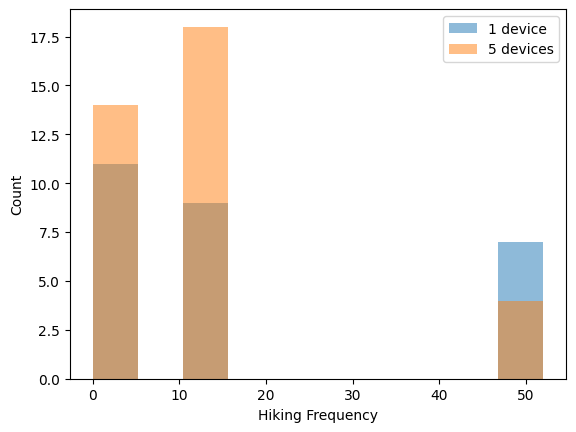

done
                    hiking_frequency_numeric
number _of_devices                          
0                                  12.000000
1                                  18.351852
2                                  15.097403
3                                  16.753425
4                                  13.868852
5                                  12.597222
6                                   9.961538
7                                  26.100000
8                                  14.500000
9                                   6.500000


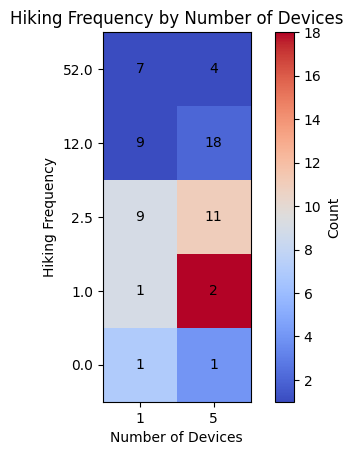


chi-square test on number of devices and hiking frequency
p-value: 0.5363644661842046
Residuals:
number _of_devices               1         5
hiking_frequency_numeric                    
0.0                       0.166667 -0.125000
1.0                      -0.222222  0.166667
2.5                       0.050000 -0.037500
12.0                     -0.222222  0.166667
52.0                      0.484848 -0.363636

device counts
number _of_devices
2    77
3    73
4    61
5    36
1    27
6    13
7     5
8     4
9     2
0     1
Name: count, dtype: int64 

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
5    smartphone
6    smartphone
7    smartphone
8    smartphone
9    smartphone
Name: smartphone, dtype: object

combined columns created
combined column creation completed

Female and Male with the number of devices
number _of_devices  0   1   2   3   4   5  6  7  8  9
Gender                                               
Female              0  12  51  30  26  1

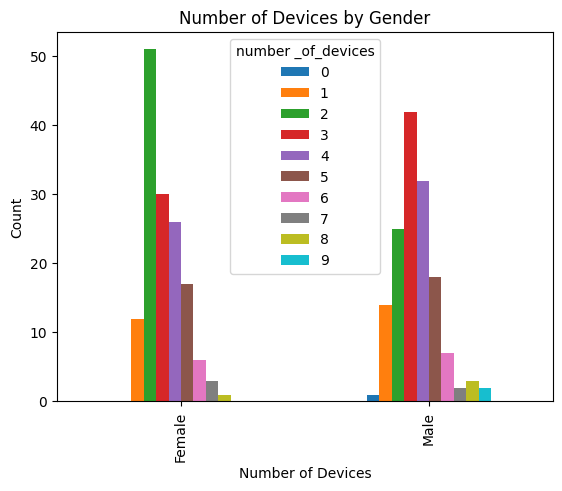

done

chi-square test on Gender and number of devices
p-value: 0.06741038888578432
Residuals:
number _of_devices    0         1         2         3         4         5  \
Gender                                                                      
Female             -1.0 -0.076923  0.342105 -0.166667 -0.103448 -0.028571   
Male                1.0  0.076923 -0.342105  0.166667  0.103448  0.028571   

number _of_devices         6    7    8    9  
Gender                                       
Female             -0.076923  0.2 -0.5 -1.0  
Male                0.076923 -0.2  0.5  1.0  

gender with 2 devices
number _of_devices   2
Gender                
Female              51
Male                25


Gender counts
Gender  Male  Female  Fill in the blank
count    146     146                  7

Two-proportion z-test using copilot ai
p-value: 0.00438572320611221
z-statistic: -2.848997449424325
Residuals:
[0.0, 0.0]

Two-proportion z-test using blackbox ai
z-statistic: -3.46761682885161
p-value

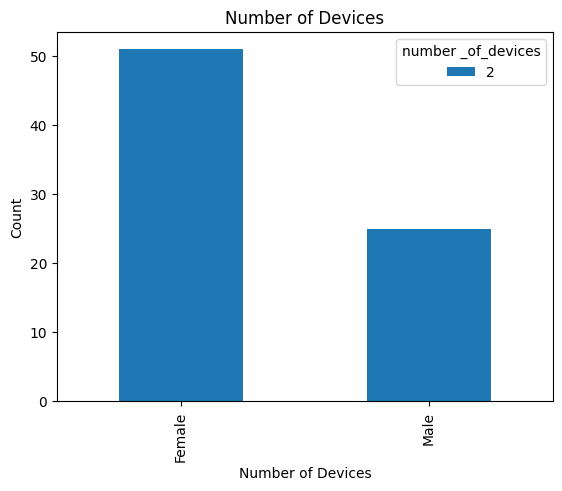

done


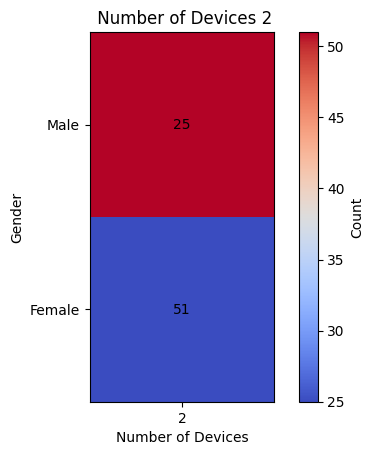


1 device and combined columns created
    number _of_devices                           combined
10                   1                                GPS
11                   1   Activity tracker (like a Fitbit)
21                   1                         Smartphone
28                   1                         Smartphone
53                   1                         Smartphone

combined and 1 device in a pivot table
combined             Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                            
1                                                   2     1   

combined             Headphones/earbuds   Smart watch  Smartphone  
number _of_devices                                                 
1                                     2             1          21  
combined            Activity tracker (like a Fitbit)   GPS  \
number _of_devices                                           
1                                               7.4%  3

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load data into a DataFrame
df = pd.read_excel('Hiking_data.xlsx')
print(df.head())  
#print(df.info())


print ("these are the gender counts---")
# Count the number of respondants in the dataset by 
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Define a mapping from categories to numerical values
mapping = {
    'Once a month': 12,  # 12 times a year
    '2-3 times per year': 2.5,  # Average of 2 and 3
    'Once a week': 52, # once a week
    'Once a year': 1, # once a year
    'Never': 0, # never
}

print ("doing the replacement...")
# Replace the categories with their numerical values
df['hiking_frequency_numeric'] = df['hiking_frequency'].replace(mapping)
print (df['hiking_frequency_numeric'].head(5))
print ("Done")

# Calculate the mean
avg_hiking_frequency = df['hiking_frequency_numeric'].mean()
print ("mean of all respondants: ")
print(avg_hiking_frequency)


print('comparison between 1 and 5 devices')


# make a new dataframe that just contains the rows in df that have 1 in the number_of_devices column
df_1_devices = df[df['number _of_devices'] == 1]
print (df_1_devices.head(10))
# and get a new dataframe with just the rows with 5 in number_of_devices
df_5_devices = df[df['number _of_devices'] == 5]
print (df_5_devices.head(10))

# Calculate the mean of the hiking duration for both groups
avg_hiking_frequency_1_devices = df_1_devices['hiking_frequency_numeric'].mean()
avg_hiking_frequency_5_devices = df_5_devices['hiking_frequency_numeric'].mean()
print ("mean of 1 devices: ")
print(avg_hiking_frequency_1_devices)
print ("mean of 5 devices: ")
print(avg_hiking_frequency_5_devices)



# Graph histogram of 1 devices and 5 devices
plt.hist(df_1_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='1 device')
plt.hist(df_5_devices['hiking_frequency_numeric'], bins=10, alpha=0.5, label='5 devices')
plt.xlabel('Hiking Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()
print('done')

# Step 3: Create a pivot table
pivot_table = pd.pivot_table(df, values='hiking_frequency_numeric', index='number _of_devices', aggfunc='mean')
print(pivot_table)
                   

# Create a pivot table with devices as columns and frequencies as rows
pivot_table = df[df['number _of_devices'].isin([1, 5])].pivot_table(index='hiking_frequency_numeric', columns='number _of_devices', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.imshow(pivot_table, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len(pivot_table.columns)-0.5, -0.5, len(pivot_table.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Hiking Frequency')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the cell values
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

plt.title('Hiking Frequency by Number of Devices')
plt.show()



# Perform chi-square test
print('\nchi-square test on number of devices and hiking frequency')
chi2, p, _, expected = stats.chi2_contingency(pivot_table)

# Print p-value
print("p-value:", p)

# Calculate residuals
residuals = (pivot_table - expected) / expected

# Display the residuals in a table
print("Residuals:")
print(residuals)


# Count the number of devices in the number_of_devices column
print('\ndevice counts')
device_counts = df['number _of_devices'].value_counts()
print(device_counts, '\n')

# change the name of yes in the smartphone column to smartphone and no to an empty string
df['smartphone'] = df['smartphone'].replace({'Yes': 'smartphone', 'No': ''})
print(df['smartphone'].head(10))


# combine the two dataframes of smartphone and name_of_devices columns
print('\ncombined columns created')
df['smartphone'] = df['smartphone'].str.lower()
df['name_of_devices'] = df['name_of_devices'].str.lower()
df['combined'] = df['smartphone'] + ', ' + df['name_of_devices']
#print(df['combined'].head(10))
print('combined column creation completed\n')


# make a new dataframe that just contains the rows in df that have 4 in the number_of_devices column
#print('\n4 devices')
#df_4_devices = df[df['number _of_devices'] == 4]
#print(df_4_devices.head(20))


#save the dataframe to a new excel file
#df.to_excel('Hiking_data_new.xlsx', index=False)
#print('done')



# Step 4: Create a pivot table of Female and Male row in the Gender column with devices column and number _of_devices columns as rows and columns
print('Female and Male with the number of devices')
pivot_table_gender = df[df['Gender'] != 'Fill in the blank'].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender)



# create a graph of the pivote_table_gender dataframe as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices by Gender')
plt.show()
print('done')



#perform a chi-square test on the pivot_table dataframe and print the p-value and residuals 
print('\nchi-square test on Gender and number of devices')
chi2, p, _, expected = stats.chi2_contingency(pivot_table_gender ) 
print("p-value:", p)
residuals = (pivot_table_gender - expected) / expected
print("Residuals:")
print(residuals)

#create a pivot table of Female and Male row in the Gender column with devices column and 2 devices row in the number _of_devices columns as rows and columns
print('\ngender with 2 devices')
pivot_table_gender_2_devices = df[(df['Gender'] != 'Fill in the blank') & (df['number _of_devices'] == 2)].pivot_table(index='Gender', columns='number _of_devices', aggfunc='size', fill_value=0)
print(pivot_table_gender_2_devices)
print('\n')

# a dataframe of the number of Male and Female row in Gender column
print('Gender counts')
pivot_table_gender = df['Gender'].value_counts().to_frame().T
print(pivot_table_gender)

# Perform two-proportion z-test
print('\nTwo-proportion z-test using copilot ai')
p1 = pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum()
p2 = pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()
n1 = pivot_table_gender.sum().sum()
n2 = pivot_table_gender_2_devices.sum().sum()

z, p = proportions_ztest([p1 * n1, p2 * n2], [n1, n2])

# Print p-value
print("p-value:", p)

# calculate the z-statistic and p-value for the two-proportion z-test
print("z-statistic:", z)
# Calculate residuals
# Calculate the expected values
expected_proportions = [p1, p2]
observed_proportions = [pivot_table_gender.iloc[0, 0] / pivot_table_gender.sum().sum(), pivot_table_gender_2_devices.iloc[0, 0] / pivot_table_gender_2_devices.sum().sum()]
residuals = [(obs - exp) / np.sqrt(exp * (1 - exp)) for obs, exp in zip(observed_proportions, expected_proportions)]

# Display the residuals
print("Residuals:")
print(residuals)


#using blackbox ai to perform the two-proportion z-test
print('\nTwo-proportion z-test using blackbox ai')
from statsmodels.stats.proportion import proportions_ztest

# Calculate the number of males and females
male_count = len(df[(df['Gender'] == 'Male') & (df['number _of_devices'] == 2)])
female_count = len(df[(df['Gender'] == 'Female') & (df['number _of_devices'] == 2)])

# Calculate the total number of observations
total_male = len(df[df['Gender'] == 'Male'])
total_female = len(df[df['Gender'] == 'Female'])

# Calculate the proportions
male_proportion = male_count / total_male
female_proportion = female_count / total_female

# Perform the two-proportion z-test
z, p = proportions_ztest([male_count, female_count], [total_male, total_female])

# Print the results
print("z-statistic:", z)
print("p-value:", p)

# Calculate the expected values
expected_values = pivot_table.values.sum(axis=0) * pivot_table.values.sum(axis=1)[:, np.newaxis] / pivot_table.values.sum()

# Display the expected values
print("Expected Values:")
print(expected_values)

#A z-statistic less than 0 indicates that the observed difference in proportions is less than the expected difference under the null hypothesis, suggesting that the proportion of one group (e.g., males) is lower than the proportion of the other group (e.g., females).
#A large absolute value of the z-statistic (e.g., greater than 2 or less than -2) indicates that the observed difference in proportions is statistically significant, suggesting that the null hypothesis can be rejected







# create a graph of the pivot table as a bar graph with the number of devices as the x-axis and the count as the y-axis
pivot_table_gender_2_devices.plot(kind='bar')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.title('Number of Devices')
plt.show()
print('done')

#create a heatmap of the pivot table as a heatmap with the number of devices as the x-axis and the count as the y-axis
plt.imshow (pivot_table_gender_2_devices, cmap='coolwarm', interpolation='nearest', extent=[-0.5, len (pivot_table_gender_2_devices.columns)-0.5, -0.5, len (pivot_table_gender_2_devices.index)-0.5])
plt.colorbar(label='Count')
plt.xlabel('Number of Devices')
plt.ylabel('Gender')
plt.xticks (range(len (pivot_table_gender_2_devices.columns)), pivot_table_gender_2_devices.columns)
plt.yticks (range(len (pivot_table_gender_2_devices.index)), pivot_table_gender_2_devices.index)
for i in range (len (pivot_table_gender_2_devices.index)):
    for j in range (len (pivot_table_gender_2_devices.columns)):
        plt.text (j, i, pivot_table_gender_2_devices.iloc[i, j], ha='center', va='center', color='black')
plt.title(' Number of Devices 2')
plt.show()


# Create a new dataframe that contains rows with 1 in the number _of_devices column and the combined column
df = pd.read_excel('Hiking_data_new.xlsx')
print('\n1 device and combined columns created')
df_1_devices_combined = df[df['number _of_devices'] == 1][['number _of_devices', 'combined']]
print(df_1_devices_combined.head())

# create pivot table of the combined column with the number of devices as the rows and the count as the columns
print('\ncombined and 1 device in a pivot table')
pivot_table_combined = df_1_devices_combined.pivot_table(index='number _of_devices', columns='combined', aggfunc='size', fill_value=0)
print(pivot_table_combined)

# Calculate the percentage of each combined category for 1 device
pivot_table_combined_percentage = pivot_table_combined.div(pivot_table_combined.sum(axis=1), axis=0) * 100
pivot_table_combined_percentage = pivot_table_combined_percentage.round(1)
pivot_table_combined_percentage = pivot_table_combined_percentage.astype(str) + '%'
print(pivot_table_combined_percentage)



# Count the number of male and female rows in the Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print('\nGender counts')